<a href="https://colab.research.google.com/github/hashiraliahmed/Portfolio/blob/dev/Stat4188_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
years = list(range(2012, 2023))

# Initialize empty lists to store data
players_all = []
colleges_all = []
nba_3pt_all = []
href_all = []

# Loop through years to scrape data
for year in years:
    request = requests.get(f'https://www.basketball-reference.com/draft/NBA_{year}.html')
    soup = bs(request.content, 'html.parser')

    # Fetch player names and hrefs from the column that contains player names with links
    player_data = soup.select('.left:nth-child(4) a')
    players = [player.text for player in player_data]
    hrefs = [player['href'] for player in player_data if player.has_attr('href')]

    # Fetch colleges
    colleges = [college.text for college in soup.select('.left~ .left+ .left')]

    # Fetch NBA 3PT%
    nba_3pt = [i.text for i in soup.select('.right:nth-child(13)')]

    # Append the extracted data to the lists
    players_all.extend(players)
    colleges_all.extend(colleges)
    nba_3pt_all.extend(nba_3pt)
    href_all.extend(hrefs)

# Create DataFrame
df = pd.DataFrame({
    'Player': players_all,
    'College': colleges_all,
    'NBA 3PT%': nba_3pt_all,
    'Player Link': href_all
})

df.head()


,Player,College,NBA 3PT%,Player Link
0,Anthony Davis,Kentucky,.297,/players/d/davisan02.html
1,Michael Kidd-Gilchrist,Kentucky,.272,/players/k/kiddgmi01.html
2,Bradley Beal,Florida,.375,/players/b/bealbr01.html
3,Dion Waiters,Syracuse,.346,/players/w/waitedi01.html
4,Thomas Robinson,Kansas,.000,/players/r/robinth01.html


In [ ]:
# Remove players who didn't go to college
df2 = df.drop(df[df['College']== ''].index)

In [ ]:
df2

,Player,College,NBA 3PT%
0,Anthony Davis,Kentucky,.297
1,Michael Kidd-Gilchrist,Kentucky,.272
2,Bradley Beal,Florida,.375
3,Dion Waiters,Syracuse,.346
4,Thomas Robinson,Kansas,.000
...,...,...,...
647,Kendall Brown,Baylor,.000
648,Isaiah Mobley,USC,.333
650,Tyrese Martin,UConn,.143
652,JD Davison,Alabama,.357


In [ ]:
! pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.2/467.2 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.6 MB/s eta 0:00:00


In [ ]:
! pip install webdriver_manager

In [ ]:
! pip install --upgrade webdriver-manager

In [ ]:
# def get_college_stats(url):
#     # Complete URL if not absolute
#     full_url = requests.compat.urljoin('https://www.basketball-reference.com', url)

#     response = requests.get(full_url)

#     page_soup = bs(response.content, 'html.parser')

#     # Locate the specific table by ID
#     table = page_soup.find('table', id='all_college_stats')

#     if not table:
#         return 'N/A'  # Return 'N/A' if the table is not found

#     # Find the <td> element with the data-stat attribute 'ft_pct'
#     ft_pct_element = table.find('td', attrs={'data-stat': 'ft_pct'})

#     # Extract the free throw percentage text if the element is found
#     ft_pct = ft_pct_element.text if ft_pct_element else 'N/A'

#     height_elements = page_soup.select('span[itemprop="height"]')
#     height = height_elements[0].text if height_elements else 'N/A'

#     # Extract points per game (PPG) assuming a specific structure
#     ppg_elements = page_soup.select('p:contains("PPG")')
#     ppg = ppg_elements[0].next_element.strip() if ppg_elements else 'N/A'

#     return ft_pct

# from selenium import webdriver
# from selenium.webdriver.chrome.service import Service
# from selenium.webdriver.common.by import By
# from bs4 import BeautifulSoup
# import time
# import requests

# def get_player_details(url):
#     path = "path"
#     service = Service(executable_path=path)
#     driver = webdriver.Chrome(service=service)

#     # Complete URL if not absolute
#     full_url = requests.compat.urljoin('https://www.basketball-reference.com', url)

#     driver.get(full_url)
#     time.sleep(5)  # Wait for JavaScript to load

#     soup = BeautifulSoup(driver.page_source, 'html.parser')
#     driver.quit()  # Close the browser

#     # Locate the specific table by ID and extract ft_pct
#     table = soup.find('table', id='all_college_stats')
#     if not table:
#         return 'N/A'

#     ft_pct_element = table.find('td', attrs={'data-stat': 'ft_pct'})
#     ft_pct = ft_pct_element.text if ft_pct_element else 'N/A'

#     return ft_pct

def get_college_stats(url):
    # Complete URL if not absolute
    full_url = requests.compat.urljoin('https://www.basketball-reference.com', url)

    response = requests.get(full_url)

    page_soup = bs(response.content, 'html.parser')
    s = page_soup.select('#all_college_stats tfoot .right:nth-child(22)')



In [ ]:
get_college_stats('/players/k/kiddgmi01.html')

[]

In [ ]:
df2['NBA 3PT%'] = pd.to_numeric(df2['NBA 3PT%'], errors='coerce')

In [ ]:
df2['NBA 3PT%'] = pd.to_numeric(df2['NBA 3PT%'], errors='coerce')

# Drop any rows with NaN values that may affect the calculations
df2 = df2.dropna(subset=['NBA 3PT%'])

# Recalculate n after cleaning
n = len(df2)

# Convert NBA 3PT% to z-scores
df2['NBA 3PT% Z'] = (df2['NBA 3PT%'] - df2['NBA 3PT%'].mean()) / df2['NBA 3PT%'].std()

# Set seed for reproducibility and define correlation
np.random.seed(42)
correlation = 0.5

# Add dummy college stats, correlated to NBA 3PT% Z-scores
random_component = np.random.normal(0, np.sqrt(1 - correlation**2), n)
df2['College 3pt%'] = df2['NBA 3PT% Z'] * correlation + random_component

# Adjust College 3pt% to a realistic scale and range, then round to 3 decimal places
df2['College 3pt%'] = ((df2['College 3pt%'] - df2['College 3pt%'].mean()) / df2['College 3pt%'].std() * 5 + 35) / 100
df2['College 3pt%'] = df2['College 3pt%'].clip(lower=0.30, upper=0.40).round(3)

# Generate other stats and round to 3 decimal places, converting to decimal
df2['College FT%'] = (np.random.normal(75, 10, n).clip(60, 90) / 100).round(3)
df2['College FG%'] = (np.random.normal(45, 5, n).clip(40, 50) / 100).round(3)

df2.head()

,Player,College,NBA 3PT%,NBA 3PT% Z,College 3pt%,College FT%,College FG%
0,Anthony Davis,Kentucky,0.297,-0.105125,0.368,0.838,0.400
1,Michael Kidd-Gilchrist,Kentucky,0.272,-0.356033,0.335,0.749,0.488
2,Bradley Beal,Florida,0.375,0.677708,0.394,0.898,0.489
3,Dion Waiters,Syracuse,0.346,0.386655,0.400,0.758,0.471
4,Thomas Robinson,Kansas,0.000,-3.085912,0.300,0.664,0.402


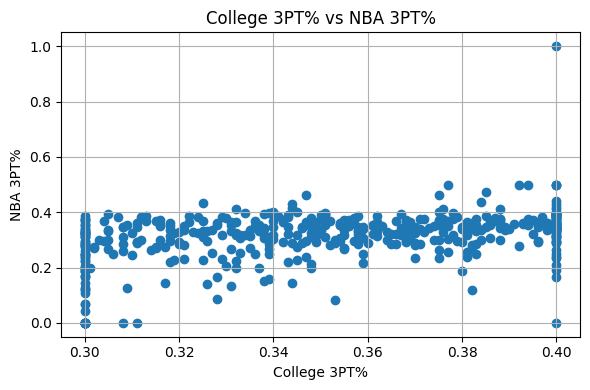

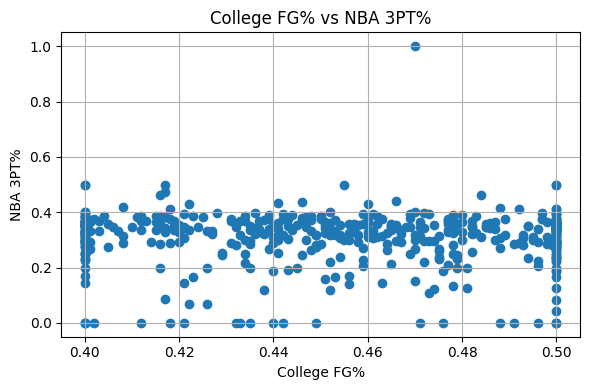

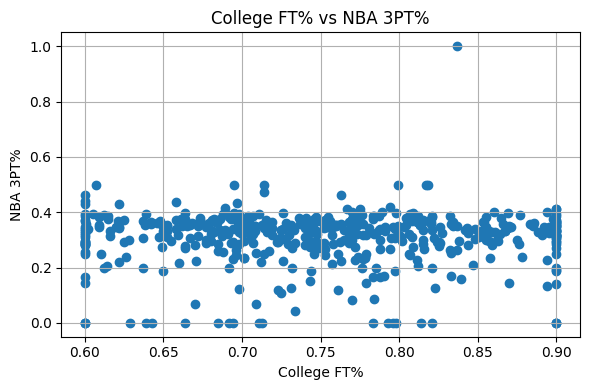

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(df2['College 3pt%'], df2['NBA 3PT%'])
plt.xlabel('College 3PT%')
plt.ylabel('NBA 3PT%')
plt.title('College 3PT% vs NBA 3PT%')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(df2['College FG%'], df2['NBA 3PT%'])
plt.xlabel('College FG%')
plt.ylabel('NBA 3PT%')
plt.title('College FG% vs NBA 3PT%')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(df2['College FT%'], df2['NBA 3PT%'])
plt.xlabel('College FT%')
plt.ylabel('NBA 3PT%')
plt.title('College FT% vs NBA 3PT%')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = df2[['College 3pt%', 'College FG%', 'College FT%']]
y = df2['NBA 3PT%']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.012927376214153961
R^2 Score: 0.1123236911454617


In [ ]:
def predict_nba_3pt(college_3pt, college_fg, college_ft):

    new_data = pd.DataFrame({
        'College 3pt%': [college_3pt],
        'College FG%': [college_fg],
        'College FT%': [college_ft]
    })
    prediction = model.predict(new_data)
    return prediction[0]

# Example using Cam Spencers stats
predicted_percentage = predict_nba_3pt(0.440, 0.484, 0.911)
print(f"Predicted NBA 3PT%: {predicted_percentage:.3f}")


Predicted NBA 3PT%: 0.425
